In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd



sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

In [108]:
#Test-1

In [109]:
#Hypothesis Formulation

#Null hypothesis (𝐻0): The mean values of order quantity (events) are the same in all groups.
#Alternative hypothesis (𝐻1): The mean values of the number of orders (events) in at least one group are different from the others.

In [110]:
#Data loading and preparation

In [111]:
df = pd.read_csv('5_task_1.csv')
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [112]:
print(df.shape)

df.info()

(30000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


In [113]:
df.isnull().sum()

id        0
group     0
events    0
dtype: int64

In [114]:
df.nunique()

id        30000
group         3
events       81
dtype: int64

In [115]:
print(df['group'].value_counts())

A    10000
B    10000
C    10000
Name: group, dtype: int64


In [116]:
df_A = df[df['group'] == 'A']['events']
df_B = df[df['group'] == 'B']['events']
df_C = df[df['group'] == 'C']['events']

In [117]:
#date of analysis

In [118]:
ss.levene(df_A, df_B, df_C, center='median') #that means the dispersions are homogeneous

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [119]:
#If the sample size in each group is 10000, the test of normality of the distribution becomes less critical,
#because with larger sample sizes, the law of large numbers and the central limit theorem allow us to assume 
#the normality of the distribution of mean values. 

In [120]:
#ANOVA

f_statistic, p_value = ss.f_oneway(df_A, df_B, df_C)

print(f"F-статистика: {f_statistic}")
print(f"P-значение: {p_value}")

#If the p-value is less than 0.05, there is a statistically significant difference between the mean values of the groups.

F-статистика: 2886.166657438961
P-значение: 0.0


In [121]:
#Tukey's HSD Test

tukey = pairwise_tukeyhsd(endog=df['events'], groups=df['group'], alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034   0.0   7.7038  8.3642   True
     A      C  -2.1093   0.0  -2.4395 -1.7791   True
     B      C -10.1433   0.0 -10.4735 -9.8131   True
----------------------------------------------------


In [122]:
#Group B is preferred because square images meaningfully increase the number of orders compared to rectangular 16:9 images (Group A).

In [123]:
#Test-2

In [155]:
#Hypothesis Formulation

#Null hypothesis(𝐻0): The introduction of a new version of the order button has no statistically significant effect on the number of user orders.
#Alternative hypothesis(𝐻1): The introduction of a new version of the order button leads to a statistically significant change in the number of user orders.

In [156]:
#Data loading and preparation

In [157]:
df = pd.read_csv('5_task_2.csv')
df

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [158]:
print(df.shape)

df.info()

(100000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


In [159]:
df.isnull().sum()

id         0
group      0
segment    0
events     0
dtype: int64

In [160]:
df.nunique()

id         100000
group           2
segment         2
events         97
dtype: int64

In [161]:
print(df['group'].value_counts())

test       50000
control    50000
Name: group, dtype: int64


In [162]:
grouped = df.groupby('group')

group_control = grouped.get_group('control')
group_test = grouped.get_group('test')

In [163]:
#date of analysis

/var/folders/6d/4w1l1x3x045ff9n6n6jmjqdm0000gn/T/ipykernel_29696/2582215000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_control['events'] = np.log(group_control['events'])
/var/folders/6d/4w1l1x3x045ff9n6n6jmjqdm0000gn/T/ipykernel_29696/2582215000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_test['events'] = np.log(group_test['events'])


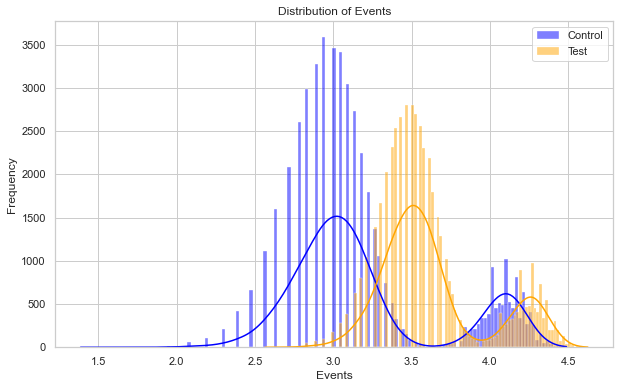

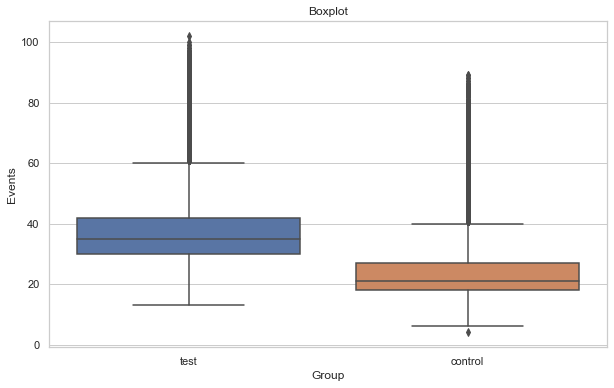

In [164]:
group_control['events'] = np.log(group_control['events'])
group_test['events'] = np.log(group_test['events'])

# Visualisation of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(group_control['events'], kde=True, color='blue', label='Control')
sns.histplot(group_test['events'], kde=True, color='orange', label='Test')
plt.legend()
plt.title('Distribution of Events')
plt.xlabel('Events')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='events', data=df)
plt.title('Boxplot')
plt.xlabel('Group')
plt.ylabel('Events')
plt.show()

In [165]:
# All data

print(ss.levene(group_control['events'], group_test['events'], center='median')) #that means the dispersions are homogeneous

t_stat, p_value = ss.ttest_ind(group_control['events'], group_test['events'], equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Checking the significance of the results
alpha = 0.05
if p_value < alpha:
    print("Differences are statistically significant")
else:
    print("Differences are not statistically significant")

LeveneResult(statistic=2622.600182498178, pvalue=0.0)
T-Statistic: -162.57243153946757, P-Value: 0.0
Differences are statistically significant


In [166]:
#Segment (high/low) 

# Segmenting the data
control_high = group_control[group_control['segment'] == 'high']
control_low = group_control[group_control['segment'] == 'low']
test_high = group_test[group_test['segment'] == 'high']
test_low = group_test[group_test['segment'] == 'low']

# Homogeneity of variance test (Levene's test)
levene_high = ss.levene(control_high['events'], test_high['events'])
levene_low = ss.levene(control_low['events'], test_low['events'])

print(f"Levene's test for high segment: p-value = {levene_high.pvalue}")
print(f"Levene's test for low segment: p-value = {levene_low.pvalue}")

# Performing t-test for independent samples by segment
ttest_high = ss.ttest_ind(control_high['events'], test_high['events'])
ttest_low = ss.ttest_ind(control_low['events'], test_low['events'])

print(f"T-test for high segment: p-value = {ttest_high.pvalue}")
print(f"T-test for low segment: p-value = {ttest_low.pvalue}")

# Making a decision
if ttest_high.pvalue < 0.05:
    print("High segment: Significant difference found, consider using the new button for high segment users.")
else:
    print("High segment: No significant difference found, no change needed for high segment users.")

if ttest_low.pvalue < 0.05:
    print("Low segment: Significant difference found, consider using the new button for low segment users.")
else:
    print("Low segment: No significant difference found, no change needed for low segment users.")

Levene's test for high segment: p-value = 2.429294930311981e-13
Levene's test for low segment: p-value = 0.0
T-test for high segment: p-value = 0.0
T-test for low segment: p-value = 0.0
High segment: Significant difference found, consider using the new button for high segment users.
Low segment: Significant difference found, consider using the new button for low segment users.


In [167]:
#Based on the tests conducted and the results obtained, we can conclude that the new order button showed 
#a statistically significant impact on the number of orders both in general for all users and in individual 
#segments (high/low). Therefore, it is recommended to implement the new button for all users of the application.